<center><h1>QBUS6860 - Visual Data Analytics</h1></center>

# Tutorial 4

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Loading the data with pandas


In [12]:
df=pd.read_csv('finset.csv')

# check data, which loaded
# short option check: print first 5 rows of data

df.head()

# or you can do print(df)
# to check whole dataset you loaded

,sector,marketcap,anrevenue,size,roi
0,telecom,12,1.0,250,8
1,telecom,18,1.5,5000,5
2,manufacturing,60,2.0,5000,9
3,retail,20,3.0,50,10
4,retail,25,2.0,250,11


You can set <code>sector</code> as DataFrame index, as it is in column 0, so we use <code>index_col=0</code>. There are some missing values in the dataset which are "??" or "????". As pandas represent missing value as "NaN", so we tell pandas to replace all "??" or "????" as "NaN"
![na](./pd.read_csv(na_value).png)

You can see the statement of document. In this parameter, all inputs strings, list, dict, or scalar are recognize as NA/NaN. Therefore, the following command <code>...,na_values=['??','????'])</code> set all '??' and '????' in dataset to NaN value.

However this dataset has no missing data. The statement just shows you this way.

In [13]:
#more detailed check
credit_data = pd.read_csv('finset.csv',na_values=["??","????"]) #index_col=0
credit_data

,sector,marketcap,anrevenue,size,roi
0,telecom,12,1.0,250,8
1,telecom,18,1.5,5000,5
2,manufacturing,60,2.0,5000,9
3,retail,20,3.0,50,10
4,retail,25,2.0,250,11
...,...,...,...,...,...
94,manufacturing,62,10.0,5000,12
95,manufacturing,67,9.0,5000,12
96,manufacturing,58,9.5,5000,13
97,manufacturing,57,9.1,5000,14


## Step 1 Distinguish Attributes of the Dataset 

Let us check how many data we have

Firstly, we are going to use the <code>.shape</code> to check the dimensions of dataset. The retune of this function is a **tuple** that contain the data of each dimensions. e.g. (first dimension(rows), seond dimension(col), third dimension(matrix), ... etc) 

In [14]:
# Learn the shape of the dataset
df.shape
# you can see here the shape of the dataset is the (99, 5) 
# which means we have 99 rows and 5 columns in dataset 'FINSET'

(99, 5)

Secondly, we can use the<code>.info()</code> to show some data information on dataset. e.g. non-null count, datatypes and memory usage etc.

In [15]:
#learn columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sector     99 non-null     object 
 1   marketcap  99 non-null     int64  
 2   anrevenue  99 non-null     float64
 3   size       99 non-null     int64  
 4   roi        99 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


One column has categorical (**object**) data and all the other columns are of the numeric type (**int64 or float64**) with non-Null entries. 

Here is a table that contain all data type in pandas and other packages. 

![datatype](./datatype.png)

Let us get quick statistical summary (any missing value -NaN - is automatically skipped). In this case, we are going to use <code>describe</code>.

<code>.describe()</code> will provide you some fundmental statistic information. e.g. count, mean, std, min, max, quartiles.

In [16]:
df.describe()

,marketcap,anrevenue,size,roi
count,99.000000,99.000000,99.000000,99.000000
mean,38.707071,5.172727,3398.484848,10.080808
std,23.904253,4.356108,2276.997380,9.383743
min,2.000000,0.200000,50.000000,1.000000
25%,14.000000,1.500000,250.000000,4.000000
50%,43.000000,3.000000,5000.000000,9.000000
75%,60.000000,9.050000,5000.000000,12.000000
max,78.000000,14.800000,5000.000000,61.000000


You see the <code>describe()</code> can only handle the numerical data for statitical summary. The '**sector**' variale was skipped. (of course, you cannot do statistic on strings or texts)

## Step 2 Univariate Analysis

### (1) first we will check for duplicates  

<code>.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)</code>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

Return dataframe with duplicate rows removed

**subset: column label or sequence of labels, optional**
Only consider certain columns for identifying duplicates, by default use all of the columns.

**keep:{‘first’, ‘last’, False}**, default ‘first’: Determines which duplicates (if any) to keep.

In [17]:
data = df.drop_duplicates(subset ="sector",)
data

,sector,marketcap,anrevenue,size,roi
0,telecom,12,1.0,250,8
2,manufacturing,60,2.0,5000,9
3,retail,20,3.0,50,10


There are only three unique sectors in our dataset

### (2) print the count of individual samples based on features

<code>DataFrame.value_counts(subset=None, normalize=False, sort=True, ascending=False, dropna=True)</code>

check the document page for more information https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

In this case, we specify the <code>subset='sector'</code> to count how many rows in specific '**sector**'. For example, in **manufacturing**, it has total 52 rows that contains manufacturing under **sector**

In [18]:
df.value_counts("sector")

sector
manufacturing    52
telecom          25
retail           22
dtype: int64

### (3) create plot of individual feature count

<code>seaborn.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)</code>

Show the counts of observations in each categorical bin using bars.

https://seaborn.pydata.org/generated/seaborn.countplot.html

**x, y, hue: names of variables in data or vector data, optional**

*Inputs for plotting long-form data. See examples for interpretation.*


**data: DataFrame, array, or list of arrays, optional**

*Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.*

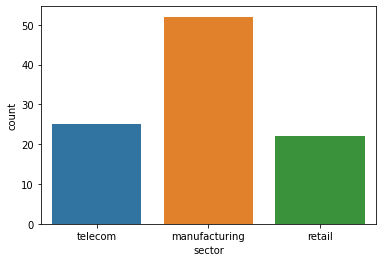

In [19]:
sns.countplot(x='sector', data=df)
plt.show()
# plt.savefig('Result01.png') 

### (4) plot value distributions for each individual feature  


<code>matplotlib.pyplot.subplot(nrows, ncols, **kwargs)</code>

https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.subplot.html

Return: 
fig and axes you have created. 

<code>matplotlib.pyplot.hist(x, bins=None,*args, data=None, **kwargs)</code>

https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.hist.html

**x: (n,) array or sequence of (n,) arrays**
Input values, this takes either a single array or a sequence of arrays which are not required to be of the same length.

**bins :int or sequence or str (default: 10)**
If bins is an integer, it defines the number of equal-width bins in the range.

If bins is a sequence, it defines the bin edges, including the left edge of the first bin and the right edge of the last bin; in this case, bins may be unequally spaced. All but the last (righthand-most) bin is half-open. In other words, if bins is: [1, 2, 3, 4]. then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.

If bins is a string, it is one of the binning strategies supported by numpy.histogram_bin_edges: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'.

Figure(720x720) [[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


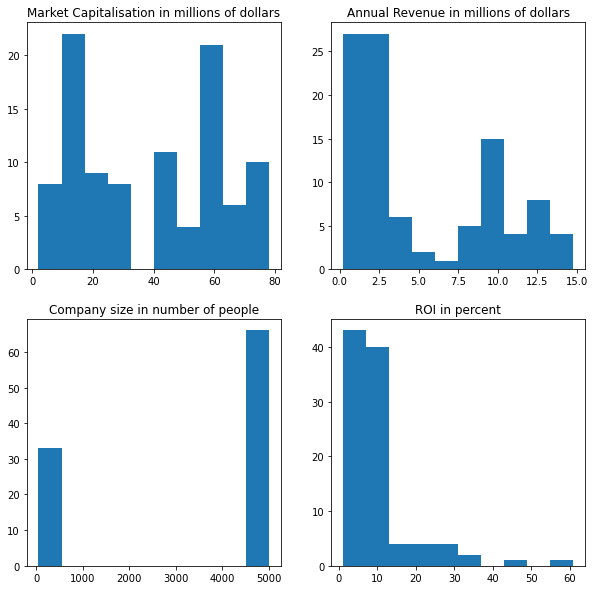

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
fig, axes = plt.subplots(2, 2, figsize=(10,10))

print(fig, axes)  # you can check what is the object 'fig' and 'axes'
  
axes[0,0].set_title("Market Capitalisation in millions of dollars")
axes[0,0].hist(df['marketcap'], bins=10); # bin=5 check any changes 

  
axes[0,1].set_title("Annual Revenue in millions of dollars")
axes[0,1].hist(df['anrevenue'], bins=10); # bin = 100?
  
axes[1,0].set_title("Company size in number of people")
axes[1,0].hist(df['size'], bins=10);
  
axes[1,1].set_title("ROI in percent")
axes[1,1].hist(df['roi'], bins=10);
plt.show()
#plt.savefig('Result02.png')

### (5) plot each individual feature by sector


<code>seaborn.FacetGrid(data, *, row=None, col=None, hue=None,...)</code>

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.

**data: DataFrame**

Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

**row, col, hue: strings**

Variables that define subsets of the data, which will be drawn on separate facets in the grid.

---

<code>seaborn.histplot(data=None, *, x=None, y=None, ..., kde=False, **kwargs)</code>

https://seaborn.pydata.org/generated/seaborn.histplot.html

**data: pandas.DataFrame, numpy.ndarray, mapping, or sequence**

Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.

**x, y: vectors or keys in data**

Variables that specify positions on the x and y axes.

**kde: bool**

If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.


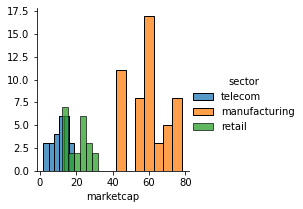

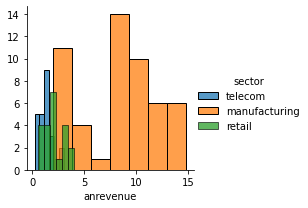

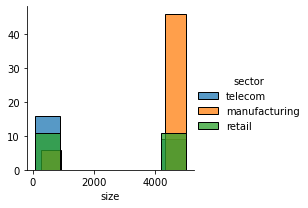

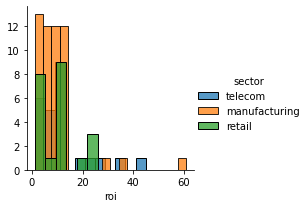

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "marketcap").add_legend()

# what if we change hue to row or col? 
# plot = sns.FacetGrid(df, row="sector")
# plot.map(sns.histplot, "marketcap").add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "anrevenue").add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "size").add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "roi").add_legend()
  
plt.show()
#plt.savefig('Result03.png')

### (6) add distributions to plots (by sector)

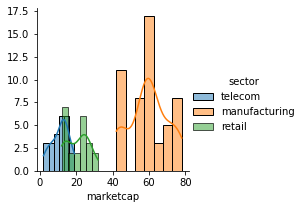

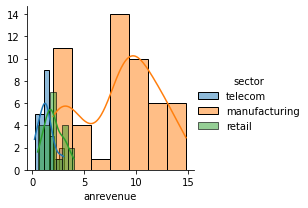

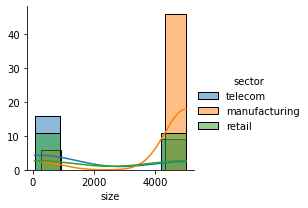

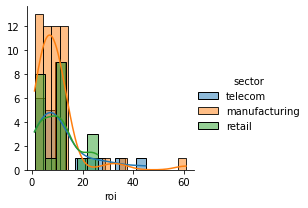

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "marketcap",kde=True).add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "anrevenue",kde=True).add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "size",kde=True).add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "roi",kde=True).add_legend()
  
plt.show()
#plt.savefig('Result04.png')

## Step 3: Detect Interactions Among Attributes

### Part 1: Bivariate Analysis


#### (a) compare market capitalisation and annual revenue

<code>seaborn.scatterplot(*, x=None, y=None, hue=None,..., data=None, ..., **kwargs)</code>

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Draw a scatter plot with possibility of several semantic groupings.

**x, y: vectors or keys in data**

Variables that specify positions on the x and y axes.

**hue: vector or key in data**

Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

**data: pandas.DataFrame, numpy.ndarray, mapping, or sequence**

Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.

---

<code>matplotlib.pyplot.legend(*args, **kwargs)</code>

https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.legend.html

**bbox_to_anchor: BboxBase, 2-tuple, or 4-tuple of floats**

Box that is used to position the legend in conjunction with loc. Defaults to axes.bbox (if called as a method to Axes.legend) or figure.bbox (if Figure.legend). This argument allows arbitrary placement of the legend.

Bbox coordinates are interpreted in the coordinate system given by bbox_transform, with the default transform Axes or Figure coordinates, depending on which legend is called.

loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5)
A 2-tuple (x, y) places the corner of the legend specified by loc at x, y. For example, to put the legend's upper right-hand corner in the center of the axes (or figure) the following keywords can be used:

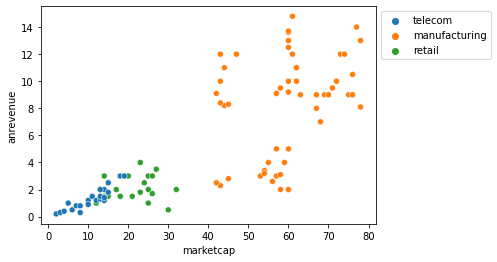

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='marketcap', y='anrevenue',
                hue='sector', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=0)
  
plt.show()
#plt.savefig('Result05.png')

Telecom has the smallest market cap and annual revenue

Retail lies in the middle of the other two sectors in terms of marketcap and revenue

Manufacturing has the largest marketcap and annualrevenue


#### (b) compare annual revenue and size


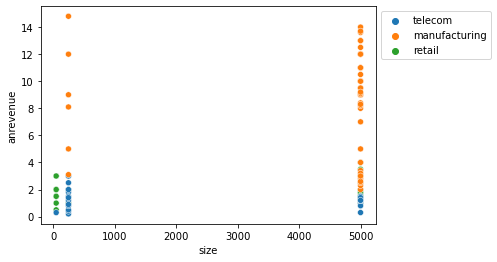

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='size', y='anrevenue',
                hue='sector', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show() 
#plt.savefig('Result06.png')

As we only have servals levels of size of company, e.g. 50, 250, 5000. Thus we will have the scatterplot like this. Many companies are considered as same size level. 

Retail has the smallest size and annual revenue

Telecom lies in-between the two sectors

Manufacturing tends to have mid and large size companies with relatively high annual revenue

#### (c) compare annual revenue and roi 

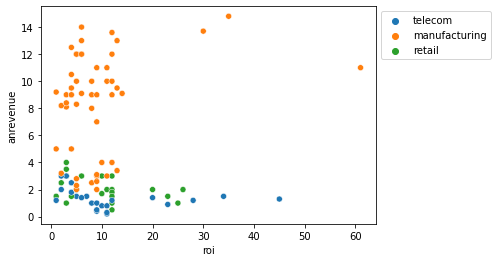

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='roi', y='anrevenue',
                hue='sector', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()
#plt.savefig('Result07.png')

No particular pattern emerges from the aove graph: no obvious relation between roi and annual revenue


### Part 2: Multivariate Analysis

#### create row id

We would like to create individual IDs help us analyze

In [72]:
import pandas as pd

df=pd.read_csv('finset.csv')

df["id"] = df.index + 1 # we add one to make id start from 1

In [73]:
df.head()

,sector,marketcap,anrevenue,size,roi,id
0,telecom,12,1.0,250,8,1
1,telecom,18,1.5,5000,5,2
2,manufacturing,60,2.0,5000,9,3
3,retail,20,3.0,50,10,4
4,retail,25,2.0,250,11,5


#### (a) create pairplot to compare all 4 variables=features



<code>DataFrame.drop(labels=None, axis=0,...)</code>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

**labels: single label or list-like**

Index or column labels to drop. A tuple will be used as a single label and not treated as a list-like.

**axis: {0 or ‘index’, 1 or ‘columns’}, default 0**

Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

---

<code>seaborn.pairplot(data, *, hue=None, ...,  height=None, ...)</code>

https://seaborn.pydata.org/generated/seaborn.pairplot.html

Plot pairwise relationships in a dataset.

**height:scalar**

Height (in inches) of each facet.

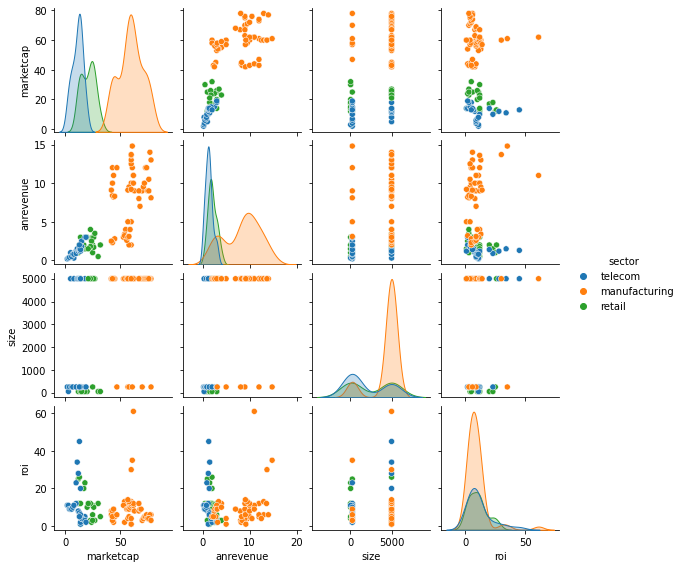

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.pairplot(df.drop(['id'], axis = 1), 
             hue='sector', height=2)

plt.show()
#plt.savefig('Result08.png')

* Manufacturing companies have the highest annual revenue 
* Manufacturing companies tend to be larger
* For all sectors market capitalisation is positively correlated with annual revenue

### (b) calculate pairwise correlation of all columns in the dataframe



<code>pandas.DataFrame.corr(method='pearson', min_periods=1)</code>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

Compute pairwise correlation of columns, excluding NA/null values.


**method: {‘pearson’, ‘kendall’, ‘spearman’} or callable**
    Method of correlation:

    -pearson : standard correlation coefficient

    -kendall : Kendall Tau correlation coefficient

    -spearman : Spearman rank correlation

    -callable: callable with input two 1d ndarrays

In [24]:
df.corr(method='pearson')

,marketcap,anrevenue,size,roi,id
marketcap,1.000000,0.797722,0.473049,-0.121217,0.753003
anrevenue,0.797722,1.000000,0.381335,0.012761,0.839197
size,0.473049,0.381335,1.000000,-0.000233,0.404228
roi,-0.121217,0.012761,-0.000233,1.000000,-0.000530
id,0.753003,0.839197,0.404228,-0.000530,1.000000


### (c) create heatmap based on calculated correlations


<code>seaborn.heatmap(data, *, ..., annot=None, ... , **kwargs)</code>

https://seaborn.pydata.org/generated/seaborn.heatmap.html

Plot rectangular data as a color-encoded matrix.

**annot: bool or rectangular dataset, optional**

If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

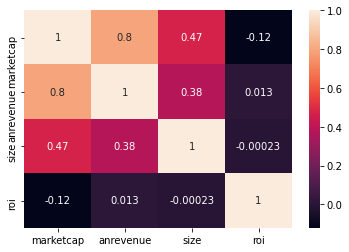

In [80]:
import pandas as pd
#df = df=pd.read_csv('finset.csv')
#df["id"] = df.index + 1
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.heatmap(df.corr(method='pearson')
            .drop(['id'], axis=1)
            .drop(['id'], axis=0),
            annot = True);  # Try annot = False
  
plt.show()
#plt.savefig('Result09.png')

**This is great, but we cannot see statistical significance and we need it to interpret our results**

<code>scipy.stats.pearsonr(x, y)</code>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

Returns

**r: float**
Pearson’s correlation coefficient.

**p-value: float**
Two-tailed p-value.

495

In [92]:
import scipy
import pandas as pd
df = pd.read_csv('finset.csv')

from scipy import stats

r_ma, p_ma = stats.pearsonr(df['marketcap'], df['anrevenue'])
r_sa, p_sa = stats.pearsonr(df['anrevenue'], df['size'])
r_ra, p_ra = stats.pearsonr(df['roi'], df['anrevenue'])
r_ms, p_ms = stats.pearsonr(df['marketcap'], df['size'])
r_mr, p_mr = stats.pearsonr(df['marketcap'], df['roi'])
r_sr, p_sr = stats.pearsonr(df['size'], df['roi'])

# print(round (r_ma, 4), 'r_ma')
# print(round (p_ma, 4), 'p_ma')
# print(round (r_sa, 4), 'r_sa')
# print(round (p_sa, 4), 'p_sa')
# print(round (r_ra, 4), 'r_ra')
# print(round (p_ra, 4), 'p_ra')
# print(round (r_ms, 4), 'r_ms')
# print(round (p_ms, 4), 'p_ms')
# print(round (r_mr, 4), 'r_mr')
# print(round (p_mr, 4), 'p_mr')
# print(round (r_sr, 4), 'r_sr')
# print(round (p_sr, 4), 'p_sr')

print('r_ma is {:.4f} and p_ma is {:.4f}'.format(r_ma, p_ma))
print('r_sa is {:.4f} and p_sa is {:.4f}'.format(r_sa, p_sa))
print('r_ra is {:.4f} and p_ra is {:.4f}'.format(r_ra, p_ra))
print('r_ms is {:.4f} and p_ms is {:.4f}'.format(r_ms, p_ms))
print('r_mr is {:.4f} and p_mr is {:.4f}'.format(r_mr, p_mr))
print('r_sr is {:.4f} and p_sr is {:.4f}'.format(r_sr, p_sr))


r_ma is 0.7977 and p_ma is 0.0000
r_sa is 0.3813 and p_sa is 0.0001
r_ra is 0.0128 and p_ra is 0.9002
r_ms is 0.4730 and p_ms is 0.0000
r_mr is -0.1212 and p_mr is 0.2320
r_sr is -0.0002 and p_sr is 0.9982


Market cap and annual revenue are strongly and positively correlated 

## Step: Detect Missing Values

In [27]:
df.isnull().sum()

sector       0
marketcap    0
anrevenue    0
size         0
roi          0
dtype: int64

No column has any missing values

## Step 6: Detect Outliers

### (1) Create box plots by sector

<code>seaborn.boxplot(*, x=None, y=None, hue=None, data=None, ... **kwargs)</code>

https://seaborn.pydata.org/generated/seaborn.boxplot.html

Draw a box plot to show distributions with respect to categories.


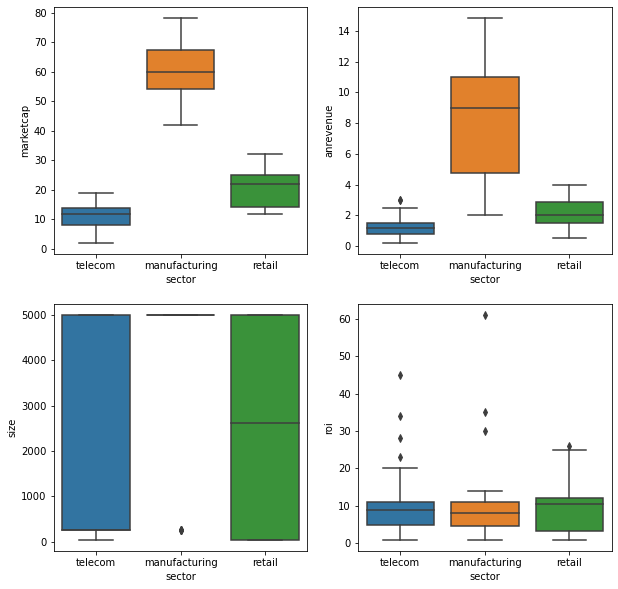

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
  
def graph(y):
    sns.boxplot(x="sector", y=y, data=df)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
# This is a second method to call subplot
# You can direct use the 
plt.subplot(221)
graph('marketcap')
  
plt.subplot(222)
graph('anrevenue')
  
plt.subplot(223)
graph('size')
  
plt.subplot(224)
graph('roi')
  
plt.show()
#plt.savefig('Result11.png')

* Telecom companies have the smallest revenue and tend to have smaller market caps
* Retail companies have medium revenue and market caps
* Manufacturing businesses have largest revenue and market caps

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects.  They can be caused by measurement or execution errors.

let's consider outliers for the roi variable

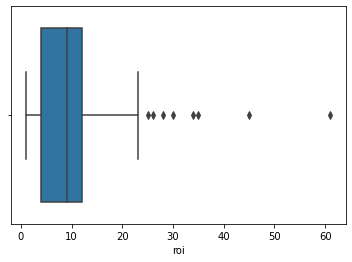

<Figure size 432x288 with 0 Axes>

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
  
# Load the dataset
df=pd.read_csv('finset.csv')
  
sns.boxplot(x='roi', data=df)

plt.show()
plt.savefig('Result12.png')

values above 12 are outliers

Let's remove outliers

we will use interquartile range method to remove them

<code>numpy.percentile(a, q, axis=None, out=None, overwrite_input=False, method='linear', keepdims=False, *, interpolation=None)</code>

https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

Compute the q-th percentile of the data along the specified axis.

**a: array_like**

Input array or object that can be converted to an array.

**q: array_like of float**

Percentile or sequence of percentiles to compute, which must be between 0 and 100 inclusive.

Old Shape:  (99, 5)
New Shape:  (87, 5)


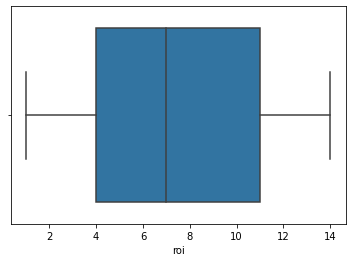

In [93]:
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
  
# Load the dataset
df=pd.read_csv('finset.csv')
  
# IQR
Q1 = np.percentile(df['roi'], 25,            # if you use numpy verision  
                interpolation = 'midpoint')  # higher than 1.22.0 please 
                                             # comment out the last kwarg.
Q3 = np.percentile(df['roi'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", df.shape)
  
# Upper bound
upper = np.where(df['roi'] >= (Q3+1*IQR))
  
# Lower bound
lower = np.where(df['roi'] <= (Q1-1*IQR))
  
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)
  
sns.boxplot(x='roi', data=df)
plt.show()
#plt.savefig('Result13.png')



**Success! we have removed outliers**



## Step 7: Feature Engineering

Regression analysis

### (a) correlation between market cap and annual revenue



<code>seaborn.regplot(*, x=None, y=None, ..., line_kws=None, ...)</code>

https://seaborn.pydata.org/generated/seaborn.regplot.html

Plot data and a linear regression model fit.

**{scatter,line}_kws: dictionaries**

Additional keyword arguments to pass to plt.scatter and plt.plot.

For example here, line_kws = {'color', 'alpha', 'lw'}
- 'color' is the kwarg for regression line's color
- 'alpha' is the kwarg for transparency of line
- 'lw' is the kwarg for line thickness


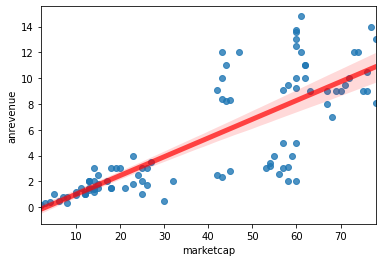

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["marketcap"],y=df["anrevenue"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()
#plt.savefig('Result14.png')

### (b) correlation between annual revenue and roi



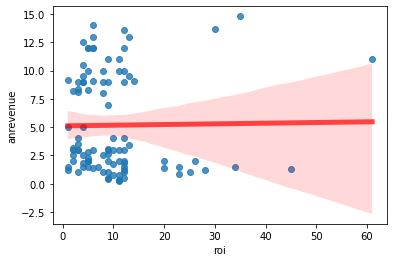

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["roi"],y=df["anrevenue"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()
#plt.savefig('Result15.png')


### (c) correlation between annual revenue and size


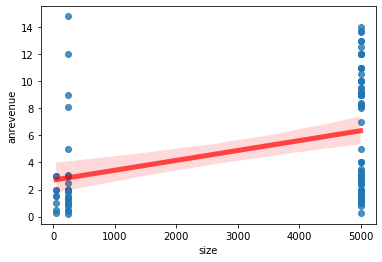

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["size"],y=df["anrevenue"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()
#plt.savefig('Result16.png')

### (d) correlation between market cap and roi

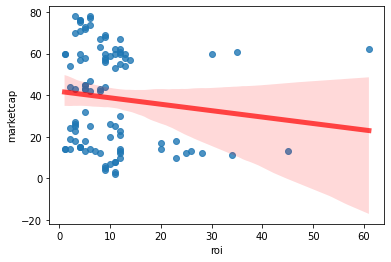

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["roi"],y=df["marketcap"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()
#plt.savefig('Result17.png')

### (d) correlation between roi and size


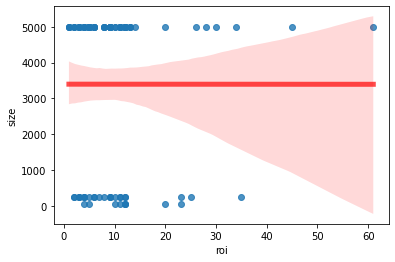

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["roi"],y=df["size"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()
#plt.savefig('Result18.png')

Since size only takes 3 values (small, medium, large), it does not make much sense treating it as numerical variable we can plot some bubble plots

#### (a) first let's explore marketcap and annual revenue relative to company size

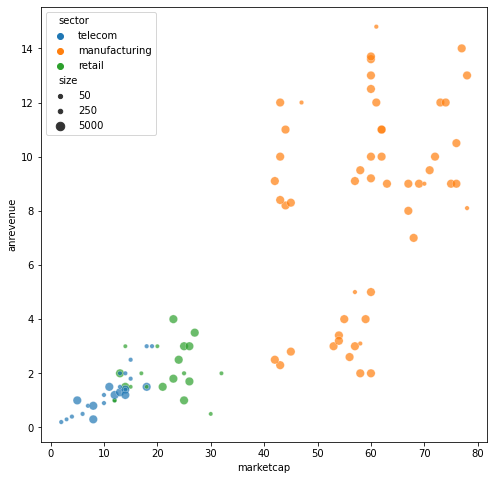

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize']=[8,8]

df=pd.read_csv('finset.csv')

data=df

sns.scatterplot(data=data,x="marketcap",y="anrevenue",size="size",hue="sector", alpha=0.7)
plt.show()
#plt.savefig('Result19.png')

#### (b) now let's explore marketcap and roi relative to company size

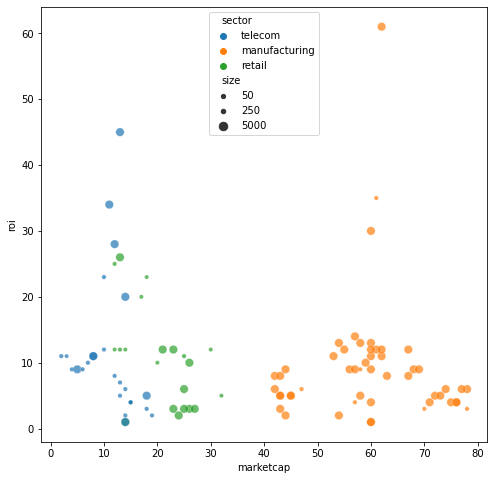

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize']=[8,8]

df=pd.read_csv('finset.csv')

data=df

sns.scatterplot(data=data,x="marketcap",y="roi",size="size",hue="sector", alpha=0.7)
plt.show()
#plt.savefig('Result20.png')

#### (c) and now let's explore annual revenue and roi relative to company size

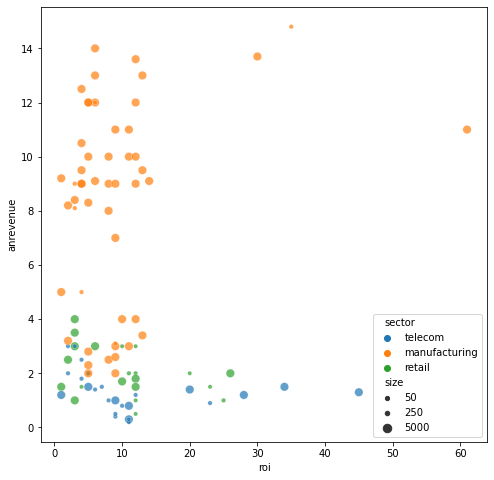

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize']=[8,8]

df=pd.read_csv('finset.csv')

data=df

sns.scatterplot(data=data,x="roi",y="anrevenue",size="size",hue="sector", alpha=0.7)
plt.show()
#plt.savefig('Result21.png')

Insight: Market capitalization is positively and significantly correlated with annual revenue. 

Manufacturing companies tend to have highet market caps, annual revenues and sizes